## 1. Introduction

### Discussing the business problem

São Paulo is a municipality in the Southeast Region of Brazil. The metropolis is an alpha global city (as listed by the GaWC) and the most populous city in Brazil, the Western Hemisphere and the Southern Hemisphere, besides being the largest Portuguese-speaking city in the world. The municipality is also the world's 12th largest city proper by population where over 12 million people live and it has a population density of 8,005 people per square kilometer. The city is the capital of the surrounding state of São Paulo, the most populous and wealthiest state in Brazil. 

It exerts strong international influences in commerce, finance, arts and entertainment. This city will be main subject of my project. São Paulo as city of many possibilities which can give better life conditions is destination of many potential residents and investors. I am going to check the real estate index and I will cluster districts according to venue density, what can help with making a choice for previously mentioned groups of people.

### Description of the data

I collected data from different sources. Some of them I had in the most raw form.
By process of collecting and pre-processing I managed to get data I needed.

Deciding which districts I will use and for which districts I will be able to find data I used below dataset to get district's names of São Paulo:

    1. Population parameters rates by district

To have a dataset containing prices of properties (for renting) I used below source:

    1. Real estate listings of Brazil - which contains data of almost 100,000 properties mainly from São Paulo
    
For purpose of getting geo coordinates of districts I wanted to use (merged part of data from above datasets based on districts' names), I used below sources:
    
    1. Merged parts of datasets: "Real estate listings of Brazil" and "Population parameters rates by district"
    2. Google Search - to find coordinates (latitude and longitude) of São Paulo districts
    
With finding the most common venues of districts in São Paulo I used below source:

    1. Foursquare API
    

## 2. Methodology

Importing necessary libraries and files containing datasets

In [1]:
# The code was removed by Watson Studio for sharing.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    cer

### Importing dataset which contains districts' names of São Paulo

In [2]:
body = client_b16bacef7b4f4142bb1ad06cd83a4740.get_object(Bucket='saopaulo-donotdelete-pr-mmrwt1ayz7esrc',Key='properati-BR-2016-11-01-properties-rent.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,2013-04-25,rent,apartment,Praia Grande,|Brasil|São Paulo|Praia Grande|,NaN,NaN,NaN,NaN,900.0,...,NaN,NaN,NaN,NaN,1.0,NaN,http://praia-grande-sao-paulo.properati.com.br...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Praia Grande,NaN
1,2013-04-25,rent,apartment,Alphaville,|Brasil|São Paulo|Barueri|Alphaville|,NaN,NaN,NaN,NaN,3200.0,...,NaN,NaN,NaN,NaN,3.0,NaN,http://alphaville-barueri.properati.com.br/q8z...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Barueri,https://thumbs-cf.properati.com/0/Wjq7toq-DpwK...
2,2013-04-25,rent,house,Centro,|Brasil|São Paulo|Jundiaí|Centro|,NaN,NaN,NaN,NaN,1800.0,...,NaN,NaN,NaN,NaN,2.0,NaN,http://centro-jundiai.properati.com.br/qe2_alu...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Jundiai,NaN
3,2013-04-25,rent,apartment,Alphaville,|Brasil|São Paulo|Barueri|Alphaville|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://alphaville-barueri.properati.com.br/s9p...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Barueri,https://thumbs-cf.properati.com/0/X7PtsZjj8Vqz...
4,2013-04-25,rent,apartment,Barueri,|Brasil|São Paulo|Barueri|,NaN,NaN,NaN,NaN,1800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://barueri.properati.com.br/s9u_aluga-se_a...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Barueri,https://thumbs-cf.properati.com/9/URn3U3gg-F6C...


### Cleaning data from data that I will not use

In [3]:
df_data_2.drop(["properati_url","description","title","expenses","price_per_m2","price_usd_per_m2","surface_covered_in_m2","geonames_id","operation","created_on","lat-lon","currency","price","price_aprox_usd","surface_total_in_m2","floor", "image_thumbnail"], axis=1, inplace=True)

### Dropping data without values
### In dataset there was some data connected to other regions of Brazil, so the data needs to be deleted

In [4]:
df_data_2.dropna(inplace=True)
df_data_2 = df_data_2[df_data_2["place_with_parent_names"].str.contains("São Paulo|São Paulo")]
df_data_2.head()

,property_type,place_name,place_with_parent_names,lat,lon,price_aprox_local_currency,rooms
154,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,-23.624269,-46.729195,2322.05,3.0
156,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,-23.616831,-46.732323,11610.34,4.0
157,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,-23.627695,-46.733921,5047.96,4.0
158,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,-23.627405,-46.730850,2221.10,1.0
159,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,-23.627405,-46.730850,2221.10,1.0


### Checking type of properties, because we wants only apartments for renting

In [5]:
df_property = df_data_2["property_type"]
print(df_property.unique())

['apartment' 'house' 'PH' 'store']


### Deleting those rows where property_type is different then "apartment"

In [6]:
df_data_2 = df_data_2[df_data_2["property_type"] == "apartment"]
print(df_data_2["property_type"].unique())
df_data_2.head()

['apartment']


,property_type,place_name,place_with_parent_names,lat,lon,price_aprox_local_currency,rooms
154,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,-23.624269,-46.729195,2322.05,3.0
156,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,-23.616831,-46.732323,11610.34,4.0
157,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,-23.627695,-46.733921,5047.96,4.0
158,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,-23.627405,-46.730850,2221.10,1.0
159,apartment,Morumbi,|Brasil|São Paulo|São Paulo|Morumbi|,-23.627405,-46.730850,2221.10,1.0


### Creating new dataframe which contains "District" and "Average_Price"

In [7]:
df_avg = df_data_2[["place_name","price_aprox_local_currency"]]
df_avg = df_avg.groupby("place_name").mean()
df_avg.reset_index(inplace=True)
df_avg.rename(columns={"place_name":"District","price_aprox_local_currency":"Average_Price"}, inplace=True)
df_avg = df_avg[["District","Average_Price"]]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_avg

,District,Average_Price
0,Aclimação,3938.804839
1,Adalgisa,6487.815000
2,Alemães,2994.360000
3,Alphaville,4867.036905
4,Alphaville Comercial,2894.535000
5,Alphaville Industrial,4743.217857
6,Alto,1446.432000
7,Alto da Boa Vista,6549.152576
8,Alto da Lapa,4135.761176
9,Alto de Pinheiros,13228.735128


### Creating variables which contain credentials to Foursquare API

In [8]:
CLIENT_ID = 'VOA2UE3LJ1ITPDL5BGFYKYIBWNS5CMFQFBOKKRPR1XBCOC3G' # your Foursquare ID
CLIENT_SECRET = '3GFVEQHN1UXAJ4XPHRCSQVVPMNZEDXWV434GWY3TILMNZVW0' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100 #100 venues for district
radius = 1000 #radius 1000 meters for district
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VOA2UE3LJ1ITPDL5BGFYKYIBWNS5CMFQFBOKKRPR1XBCOC3G
CLIENT_SECRET:3GFVEQHN1UXAJ4XPHRCSQVVPMNZEDXWV434GWY3TILMNZVW0


### Importing dataset which I created by raw data which contains districts' names of São Paulo with their geo coordinates

In [9]:
body = client_b16bacef7b4f4142bb1ad06cd83a4740.get_object(Bucket='saopaulo-donotdelete-pr-mmrwt1ayz7esrc',Key='districts_sao_paulo.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5


,District,Latitude,Longitude
0,Água Rasa,-20.4333,-45.1667
1,Alto de Pinheiros,-23.5537,-46.7088
2,Anhanguera,-18.3343,-48.2208
3,Aricanduva,-23.5795,-46.5110
4,Artur Alvim,-23.5460,-46.4690
5,Barra Funda,-23.5292,-46.6610
6,Bela Vista,-23.5554,-46.6456
7,Belém,-23.5471,-46.5912
8,Bom Retiro,-23.5257,-46.6407
9,Brás,-23.5377,-46.6140


### Merging two datasets to have dataset which will be main source of data used in the next steps

In [10]:
df_outer = pd.merge(df_data_5, df_avg, on='District', how='outer')
df_outer.dropna(inplace=True)

df_outer

,District,Latitude,Longitude,Average_Price
0,Água Rasa,-20.4333,-45.1667,1468.655714
1,Alto de Pinheiros,-23.5537,-46.7088,13228.735128
3,Aricanduva,-23.5795,-46.5110,1364.076667
4,Artur Alvim,-23.5460,-46.4690,884.037143
5,Barra Funda,-23.5292,-46.6610,2866.100392
6,Bela Vista,-23.5554,-46.6456,4271.273265
7,Belém,-23.5471,-46.5912,2234.671111
8,Bom Retiro,-23.5257,-46.6407,1583.107073
9,Brás,-23.5377,-46.6140,1568.705000
10,Brasilândia,-21.2555,-52.0365,1260.485000


### Using Nominatim to get coordinates of São Paulo

In [11]:
address = "São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Intermediária de São Paulo, São Paulo, Southeast Region, Brazil"
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print("The coordinates of São Paulo is ({}, {}).".format(latitude, longitude))

The coordinates of São Paulo is (-23.5506507, -46.6333824).


### Creating folium map with markers (districts) based on data from df_outer - my main dataset and from Nominatim coordinates of São Paulo

In [12]:
map_sao_paulo = folium.Map(location=[latitude,longitude], zoom_start=10)

# add markers to map
for lat, lng, district in zip(df_outer['Latitude'], df_outer['Longitude'], df_outer['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_sao_paulo)  
    
map_sao_paulo

### Creating function which return data about districts and close venues

In [13]:
def closeVenues(names, latitudes, longitudes, radius=1000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return just some informations
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    close_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    close_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(close_venues)

### Getting data about districts and their close venues

In [14]:
venues_sao_paulo = closeVenues(names=df_outer['District'],
                                   latitudes=df_outer['Latitude'],
                                   longitudes=df_outer['Longitude']
                                  )

### Printing number of rows and columns of the venues_sao_paulo dataset
### Displaying first 5 rows of the dataset

In [15]:
print(venues_sao_paulo.shape)
venues_sao_paulo.head()

(5511, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alto de Pinheiros,-23.5537,-46.7088,Droga Raia,-23.554750,-46.709082,Pharmacy
1,Alto de Pinheiros,-23.5537,-46.7088,Pão de Açúcar ( Antigo Sé),-23.552717,-46.708607,Market
2,Alto de Pinheiros,-23.5537,-46.7088,Senzala Bar & Grill,-23.554694,-46.708755,Bar
3,Alto de Pinheiros,-23.5537,-46.7088,Clube Alto dos Pinheiros,-23.558772,-46.707538,Other Great Outdoors
4,Alto de Pinheiros,-23.5537,-46.7088,Praça Pôr do Sol,-23.553541,-46.702875,Plaza


### Counting venues for each district - descending

In [16]:
no_venues = venues_sao_paulo.groupby('District').count().reset_index()
no_venues['Count'] = no_venues['Venue']
no_venues = no_venues.drop(['District Latitude', 'District Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
print("Venues count - descending (limit 100)")
no_venues_desc = no_venues.sort_values('Count', ascending=False).reset_index(drop=True)
no_venues_desc.head()

Venues count - descending (limit 100)


,District,Count
0,Moema,100
1,Pinheiros,100
2,Itaim Bibi,100
3,Jabaquara,100
4,Jardim Paulista,100


### Counting venues for each district - ascending

In [17]:
print("Venues count - ascending")
no_venues_asc = no_venues.sort_values('Count', ascending=True).reset_index(drop=True)
no_venues_asc.head()

Venues count - ascending


,District,Count
0,Brasilândia,4
1,Conjunto Residencial José Bonifácio,5
2,Cidade Tiradentes,11
3,Ermelino Matarazzo,12
4,Parque São Rafael,14


### Creating bar plot which represents venues count for every district in São Paulo

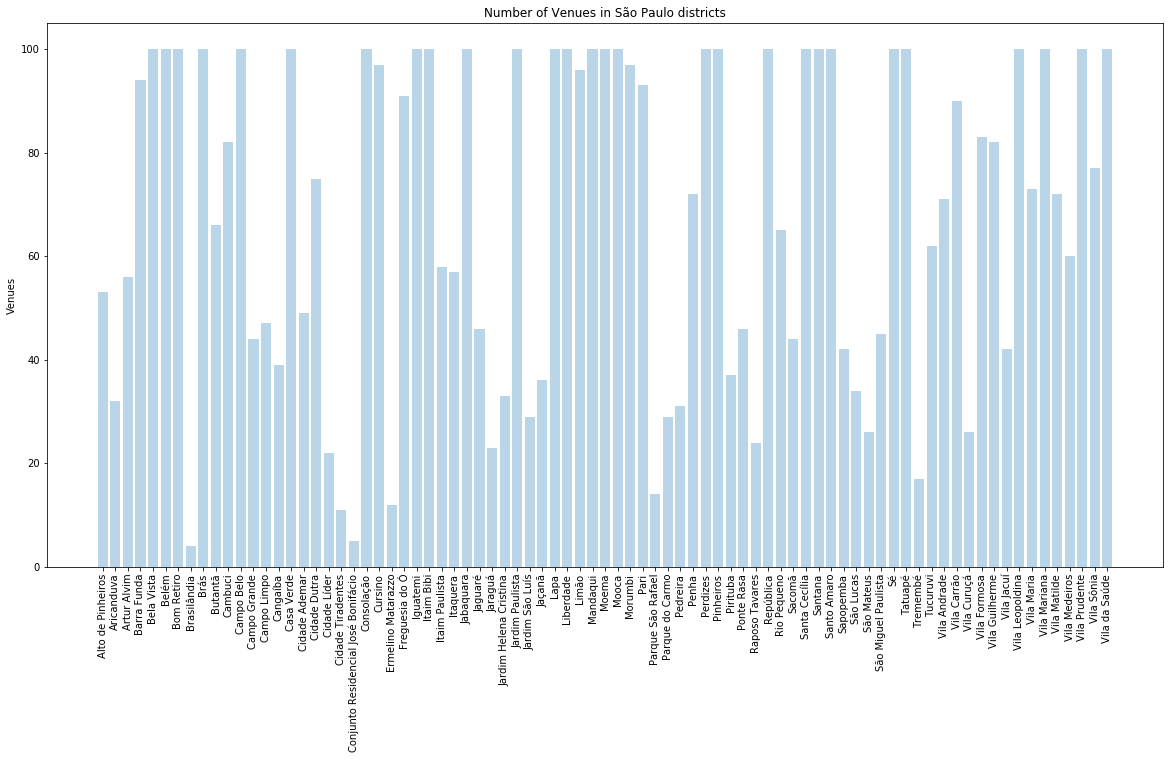

In [92]:
import matplotlib.pyplot as plt
 
district_name = no_venues.District
y_pos = np.arange(len(district_name))
venues_count = no_venues.Count

plt.figure(figsize=(20,10)) 
plt.bar(y_pos, venues_count, alpha=0.3)
plt.xticks(y_pos,district_name)
plt.xticks(rotation=90)
plt.ylabel("Venues")
plt.title("Number of Venues in São Paulo districts")

plt.show()

In [19]:
# one hot encoding
onehot_sao_paulo = pd.get_dummies(venues_sao_paulo[["Venue Category"]], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot_sao_paulo["District"] = venues_sao_paulo["District"] 

# move neighborhood column to the first column
list_column = onehot_sao_paulo.columns.tolist()
number_column = int(list_column.index("District"))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
onehot_sao_paulo = onehot_sao_paulo[list_column]

onehot_sao_paulo.head()

,District,Acai House,Accessories Store,Adult Boutique,Airport,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Baiano Restaurant,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Bookstore,Borek Place,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Car Wash,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Cafeteria,College Gym,College Quad,College Soccer Field,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Country Dance Club,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dive Shop,Dive Spot,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Empada House,Empanada Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Fish Taverna,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Frame Store,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indoor Play Area,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundry Service,Leather Goods Store,Library,Lighting Store,Lingerie Store,Liquor Store,Lottery Retailer,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mental Health Office,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mineiro Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,Northeastern Brazilian Restaurant,Northern Brazilian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Paper / Office Supplies Store,Park,Pastelaria,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Piercing Parlor,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Road,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Samba School,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shoppi

In [20]:
grp_sao_paulo = onehot_sao_paulo.groupby("District").mean().reset_index()
grp_sao_paulo.head()

,District,Acai House,Accessories Store,Adult Boutique,Airport,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Baiano Restaurant,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Bookstore,Borek Place,Boutique,Bowling Alley,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Building,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Car Wash,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Bookstore,College Cafeteria,College Gym,College Quad,College Soccer Field,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Country Dance Club,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dive Bar,Dive Shop,Dive Spot,Dog Run,Donburi Restaurant,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Empada House,Empanada Restaurant,Event Service,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Fish Taverna,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Frame Store,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Indoor Play Area,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundry Service,Leather Goods Store,Library,Lighting Store,Lingerie Store,Liquor Store,Lottery Retailer,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mental Health Office,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mineiro Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Nightclub,Noodle House,Northeastern Brazilian Restaurant,Northern Brazilian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Paper / Office Supplies Store,Park,Pastelaria,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pie Shop,Piercing Parlor,Pizza Place,Playground,Plaza,Polish Restaurant,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Pub,Public Art,Racecourse,Racetrack,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Road,Rock Club,Sake Bar,Salad Place,Salon / Barbershop,Samba School,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Science Museum,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shoppi

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [22]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['District'] = grp_sao_paulo['District']

for ind in np.arange(grp_sao_paulo.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grp_sao_paulo.iloc[ind, :], num_top_venues)

districts_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alto de Pinheiros,Plaza,Athletics & Sports,Bike Rental / Bike Share,Convenience Store,Bar,Track,Restaurant,Theater,Gym / Fitness Center,Gym
1,Aricanduva,Bakery,Pizza Place,Gym / Fitness Center,Supermarket,Snack Place,Soccer Stadium,BBQ Joint,Pet Store,Pharmacy,Gymnastics Gym
2,Artur Alvim,Clothing Store,Fast Food Restaurant,Hot Dog Joint,Coffee Shop,Café,Burger Joint,Chinese Restaurant,Fried Chicken Joint,Italian Restaurant,Chocolate Shop
3,Barra Funda,Brazilian Restaurant,Pizza Place,Dessert Shop,Restaurant,Bar,Nightclub,Plaza,Italian Restaurant,Beer Bar,Supermarket
4,Bela Vista,Italian Restaurant,Bar,Brazilian Restaurant,Theater,Bakery,Hotel,Pizza Place,Pet Store,Coffee Shop,Nightclub


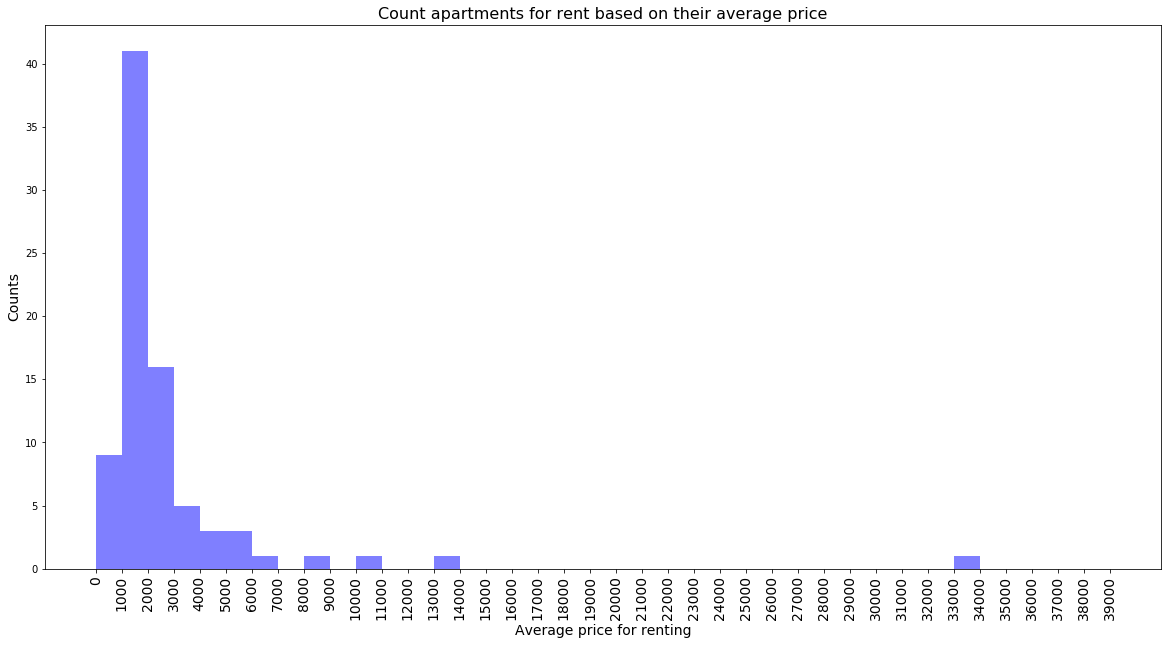

In [49]:
plt.figure(figsize=(20,10))
n, bins, patches = plt.hist(df_outer["Average_Price"], bins=np.arange(start=0, stop=40000, step=1000), facecolor="blue", alpha=0.5)
plt.title("Count apartments for rent based on their average price",fontsize= 16)
plt.xticks(np.arange(start=0, stop=40000, step=1000))
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.xlabel("Average price for renting", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.show()

In [93]:
!wget --quiet https://raw.githubusercontent.com/rafaelkrych/data-science/master/sao_paulo_neighbourhoods.geojson.json -O sao_paulo_geo.json

sao_paulo_geo = r'sao_paulo_geo.json'

In [97]:
sao_paulo_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_outer["Average_Price"].min(),
                              df_outer['Average_Price'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1]

sao_paulo_map.choropleth(
    geo_data=sao_paulo_geo,
    data=df_outer,
    columns=['District','Average_Price'],
    key_on='feature.properties.display_name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Apartament renting price in São Paulo',
    highlight=True
)

markers_colors = []
for lat, lon, poi in zip(df_outer['Latitude'], df_outer['Longitude'], df_outer['District']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color= 'YlOrRd',
        fill=True,
        fill_color= 'YlOrRd',
        fill_opacity=1).add_to(sao_paulo_map)

   
sao_paulo_map

IndexError: list index out of range

## References
1. https://en.wikipedia.org/wiki/São_Paulo
2. https://www.google.com
3. https://foursquare.com
4. https://data.world/properati/real-estate-listings-brazil
5. https://data.world/carolpos/population-growth-rates-and-population-density-sao-paulo/workspace/file?filename=population_parameters_rates_by_district.csv